In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
### Función para revisar la calidad del dataframe

def quality_report(data):

    """This method will do a basic data quality report for a data frame"""
        
    if (type(data) != pd.core.frame.DataFrame):
        raise TypeError("Data must be pandas.core.frame.DataFrame")
    else: 
        columns = list(data.columns.values)
        data_type = pd.DataFrame(data.dtypes, columns=['Data type'])
        missing_data = pd.DataFrame(
        data.isnull().sum(), columns=['missing values'])
        present_data = pd.DataFrame(data.count(), columns=['present values'])
        unique_values = pd.DataFrame(columns=['unique values'])
        minimum_values = pd.DataFrame(columns=['minimum values'])
        max_values = pd.DataFrame(columns=['maximun values'])
        
        for i in columns:
            unique_values.loc[i] = [data[i].nunique()]
            try:
                minimum_values.loc[i] = [data[i].min()]
                max_values.loc[i] = [data[i].max()]
            except:
                pass
        
        DQ_report = data_type.join(missing_data).join(present_data).join(
        unique_values).join(minimum_values).join(max_values)
    
    return DQ_report

In [3]:
metros_cuadrados = 'metros_cuadrados.xlsx'
metros_2 = pd.read_excel(metros_cuadrados)
metros_2.head()


,Inmueble,Municipio,Precio,Colonia,Metros cuadrados de terreno,Metros cuadrados de construcción
0,Casa,TLAJOMULCO,380000,NaN,75.0,5233.0
1,Casa,TLAJOMULCO,398000,NaN,80.0,5266.0
2,Casa,TLAQUEPAQUE,1730000,NaN,13484.0,NaN
3,Casa,GUADALAJARA,2650000,NaN,NaN,NaN
4,Departamento,TLAJOMULCO,390000,NaN,4444.0,4815.0


In [4]:
## Revisando la calidad del dataframe

quality_report(metros_2)

,Data type,missing values,present values,unique values,minimum values,maximun values
Inmueble,object,0,16809,2,Casa,Departamento
Municipio,object,0,16809,6,EL SALTO,ZAPOPAN
Precio,int64,0,16809,3898,250000,94122000
Colonia,object,8982,7827,638,NaN,NaN
Metros cuadrados de terreno,float64,1842,14967,1152,50,14850
Metros cuadrados de construcción,float64,4529,12280,895,50,14722


In [5]:
## Estadísticas generales

metros_2.describe()

,Precio,Metros cuadrados de terreno,Metros cuadrados de construcción
count,1.680900e+04,14967.000000,12280.000000
mean,5.967806e+06,325.819479,285.319490
std,6.703072e+06,907.132283,709.579502
min,2.500000e+05,50.000000,50.000000
25%,2.250000e+06,99.000000,110.000000
50%,3.963000e+06,148.000000,170.000000
75%,6.698000e+06,269.000000,298.000000
max,9.412200e+07,14850.000000,14722.000000


In [6]:
dataset = metros_2.fillna(0)

In [7]:
## Creando datasets por municipio

zapopan = dataset[dataset['Municipio']=='ZAPOPAN']
tonala = dataset[dataset['Municipio']=='TONALA']
guadalajara = dataset[dataset['Municipio']=='GUADALAJARA']
tlaquepaque = dataset[dataset['Municipio']=='TLAQUEPAQUE']
el_salto = dataset[dataset['Municipio']=='EL SALTO']
tlajomulco = dataset[dataset['Municipio']=='TLAJOMULCO']


metros_zapopan = zapopan['Metros cuadrados de terreno']
promedio_zapopan = metros_zapopan.mean()
min_zapopan = metros_zapopan.min()
max_zapopan = metros_zapopan.max()

metros_tonala = tonala['Metros cuadrados de terreno']
promedio_tonala = metros_tonala.mean()
min_tonala = metros_tonala.min()
max_tonala = metros_tonala.max()

metros_gdl = guadalajara['Metros cuadrados de terreno']
promedio_gdl = metros_gdl.mean()
min_gdl = metros_gdl.min()
max_gdl = metros_gdl.max()

metros_tlajo = tlajomulco['Metros cuadrados de terreno']
promedio_tla = metros_tlajo.mean()
min_tlajo = metros_tlajo.min()
max_tlajo = metros_tlajo.max()

metros_salto = el_salto['Metros cuadrados de terreno']
promedio_salto = metros_salto.mean()
min_salto = metros_salto.min()
max_salto = metros_salto.max()

metros_tlaque = tlaquepaque['Metros cuadrados de terreno']
promedio_tlaque = metros_tlaque.mean()
min_tlaque = metros_tlaque.min()
max_tlaque = metros_tlaque.max()



stats_metros = pd.DataFrame({'Municipio':('Zapopan','GDL', 'Tlajomulco', 'El Salto', 'Tlaquepaque'),
                     'Promedio': (promedio_zapopan,promedio_gdl, promedio_tla, promedio_salto, promedio_tlaque),
                     'min':(min_zapopan, min_gdl, min_tlajo, min_salto,min_tlaque),
                     'max': (max_zapopan, max_gdl, max_tlajo, max_salto,max_tlaque)})
stats_metros

,Municipio,Promedio,min,max
0,Zapopan,336.564665,0.0,14850.0
1,GDL,183.011473,0.0,10203.0
2,Tlajomulco,532.498445,0.0,14769.0
3,El Salto,565.363636,0.0,6105.0
4,Tlaquepaque,217.590466,0.0,14009.0


In [8]:
min_zapopan

0.0

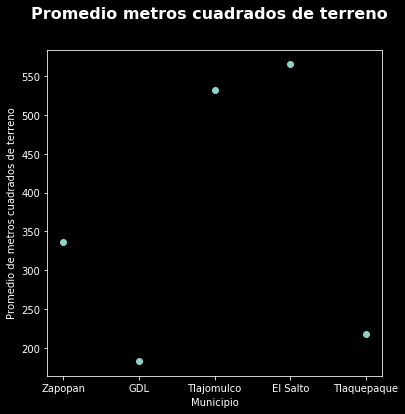

In [9]:
plt.style.use('dark_background')
fig,ax = plt.subplots(figsize = (6,6))
promedio = ax.scatter(x=stats_metros['Municipio'],
                     y = stats_metros['Promedio'],)


ax.set(xlabel='Municipio',
      ylabel = 'Promedio de metros cuadrados de terreno')
fig.suptitle('Promedio metros cuadrados de terreno', fontsize=16, fontweight='bold');



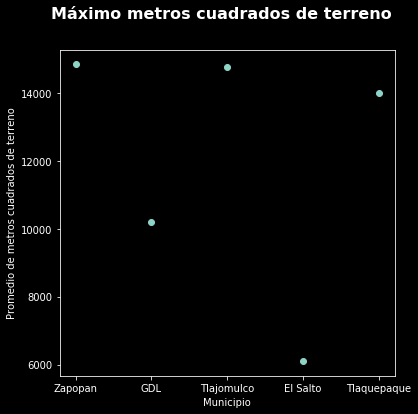

In [10]:
plt.style.use('dark_background')
fig,ax = plt.subplots(figsize = (6,6))
promedio = ax.scatter(x=stats_metros['Municipio'],
                     y = stats_metros['max'],)


ax.set(xlabel='Municipio',
      ylabel = 'Promedio de metros cuadrados de terreno')
fig.suptitle('Máximo metros cuadrados de terreno', fontsize=16, fontweight='bold');


#### Linear regression  precio/metros cuadrados de contruccion

In [11]:
new_dataset = 'precio_metros.xlsx'
new_data = pd.read_excel(new_dataset)
new_data_fill = new_data.fillna(1)
new_data_fill_2 = new_data_fill.drop('Metros cuadrados de terreno', axis=1)
new_data_fill_2.tail(2)
w = new_data_fill['Metros cuadrados de terreno']

In [12]:
X = new_data_fill_2.drop('Metros cuadrados de construcción', axis = 1)
y = new_data_fill_2['Metros cuadrados de construcción']

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)

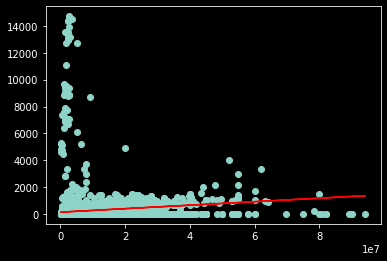

In [14]:
plt.scatter(X,y)
plt.plot(X, y_pred,color = 'r')
plt.show()



##### Linear regression precio/metros cuadrados de terreno

In [15]:


from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,w)
y_pred = lr.predict(X)

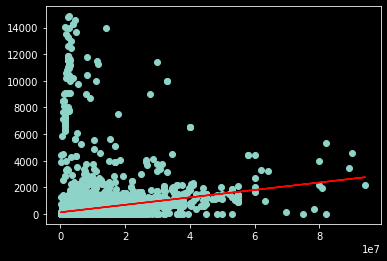

In [16]:
plt.scatter(X,w)
plt.plot(X, y_pred,color = 'r')
plt.show()

